In [1]:
import pandas as pd
from glob import glob
import seaborn as sns
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Config Session
### This session contains static information essential to the code

In [2]:
PATH_FILE = 'data/metrics_accuracy'
# PATH_FILE_HOMO = 'data/metrics_accuracy_test'


METRICS_CHART = [
    'Overall Accuracy',
    'Omission Error',
    'Comission Error'
]

YEARS = list(range(1985, 2022, 1))

TARGET_YEAR = 2021

COLORS = [
    '#006400', '#00ff00', '#45c2a5', '#b8af4f', '#ffd966', '#e974ed', '#0000ff'
]

CLASSES = {
    3: 'Forest',
    4: 'Shrubland',
    #6: 'Flooded Forest',
    11: 'Wetland',
    12: 'Natural Grassland',
    15: 'Pastureland',
    18: 'Cropland',
    #22: 'Bareland and Impervious',
    #29: 'Rock Outcrop',
    33: 'Water'
}


## Input Data
### This session we load the input data, files to perform calculations

In [3]:
df_cm = pd.read_csv(PATH_FILE + f'/confusion_matrix_{TARGET_YEAR}.csv', index_col=0)
df_cm_perc = pd.read_csv(PATH_FILE + f'/confusion_matrix_percentage_{TARGET_YEAR}.csv', index_col=0)


df_metrics = []


for year in YEARS:
    df = pd.read_csv(f'{PATH_FILE}/metrics_{year}.csv')
    df['year'] = year
    df_metrics.append(df)


df_metrics = pd.concat(df_metrics)
df_metrics = df_metrics.rename(columns={'Unnamed: 0': 'classe'})

df_overall_acc = pd.read_csv(f'{PATH_FILE}/overall_acc.csv')

df_overall_acc = df_overall_acc[['year', 'acc']]

## Get Total Samples By Class
### Change table structure

In [4]:
df_cm_years = []
for year in YEARS:
    df_cm_year = pd.read_csv(PATH_FILE + f'/confusion_matrix_{year}.csv', index_col=0)
    df_cm_year['Year'] = year
    df_cm_years.append(df_cm_year)

df_cm_years = pd.concat(df_cm_years)

df_cm_years = df_cm_years[['Total', 'Year']].reset_index().rename(columns = {'index': 'classes'})
df_cm_years = df_cm_years.query('classes != "Total"')

# df_cm_years.to_csv('data/metrics_acc/total_samples.csv')
df_cm_years

,classes,Total,Year
0,Forest,18589,1985
1,Shrubland,307,1985
2,Wetland,231,1985
3,Natural Grassland,691,1985
4,Pastureland,1043,1985
...,...,...,...
290,Wetland,253,2021
291,Natural Grassland,635,2021
292,Pastureland,3494,2021
293,Cropland,553,2021


## Overall Accuracy 

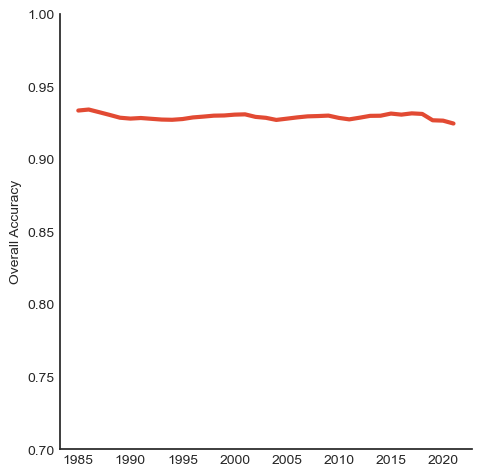

'\n    1. considerar flooded forest como floresta\n    2. adicionar novos valores das classes como linhas (tracejado)\n\n'

In [5]:

# fig, ax = plt.subplots()
plt.style.use('ggplot')
plt.style.use('seaborn-white')

g = sns.relplot(
    data=df_overall_acc, x="year", y="acc",linewidth=3,
    kind="line", palette=['black']
)

g.set_axis_labels("", "Overall Accuracy")
g.ax.set_ylim(0.7, 1)


plt.show()

'''
    1. considerar flooded forest como floresta
    2. adicionar novos valores das classes como linhas (tracejado)

'''

## Confusion Matrix

In [6]:
df_cm

,Forest,Shrubland,Wetland,Natural Grassland,Pastureland,Cropland,Water,Total
Forest,16317,24,78,76,224,3,11,16733
Shrubland,61,35,50,103,16,0,0,265
Wetland,30,9,159,38,3,0,14,253
Natural Grassland,27,7,173,420,8,0,0,635
Pastureland,296,24,20,94,3015,45,0,3494
Cropland,29,1,3,17,166,337,0,553
Water,19,1,13,5,3,0,351,392
Total,16779,101,496,753,3435,385,376,22325


In [7]:
df_cm_perc

,Forest,Shrubland,Wetland,Natural Grassland,Pastureland,Cropland,Water
Forest,97.51,0.14,0.47,0.45,1.34,0.02,0.07
Shrubland,23.02,13.21,18.87,38.87,6.04,0.00,0.00
Wetland,11.86,3.56,62.85,15.02,1.19,0.00,5.53
Natural Grassland,4.25,1.10,27.24,66.14,1.26,0.00,0.00
Pastureland,8.47,0.69,0.57,2.69,86.29,1.29,0.00
Cropland,5.24,0.18,0.54,3.07,30.02,60.94,0.00
Water,4.85,0.26,3.32,1.28,0.77,0.00,89.54


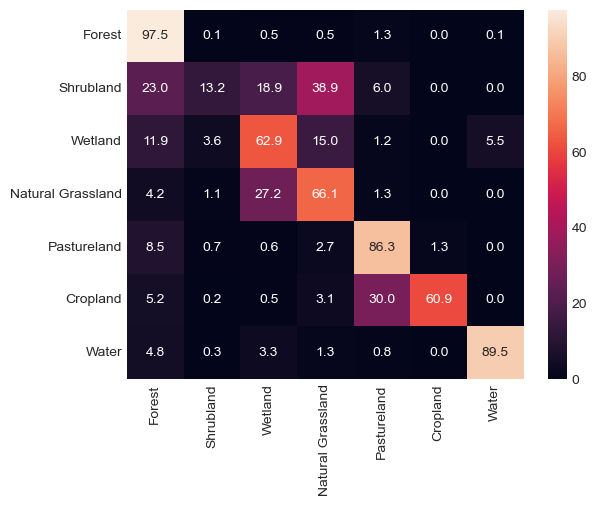

In [8]:
df_heat = df_cm_perc.loc[~df_cm_perc.index.isin(CLASSES.keys())]

sns.heatmap(df_heat[CLASSES.values()], annot=True, fmt=".1f")

plt.show()

## Metrics
### producer, user, OE, OC

In [9]:
df_metrics.query(f'year == {TARGET_YEAR}')

,classe,Accuracy User,Accuracy Producer,Comission Error,Omission Error,year
0,Forest,0.98,0.97,0.02,0.03,2021
1,Shrubland,0.13,0.35,0.87,0.65,2021
2,Wetland,0.63,0.32,0.37,0.68,2021
3,Natural Grassland,0.66,0.56,0.34,0.44,2021
4,Pastureland,0.86,0.88,0.14,0.12,2021
5,Cropland,0.61,0.88,0.39,0.12,2021
6,Water,0.90,0.93,0.10,0.07,2021


## Metrics Chart
### Change Table Structure to get One Single Chart

In [39]:
# normalize overall acc table
df_overall_acc_metrics = df_overall_acc.rename(columns = {'acc': 'value'})
df_overall_acc_metrics['metrics'] = 'Overall Accuracy'
df_overall_acc_metrics['classe'] = 'All'
df_overall_acc_metrics['metrics_by_cls'] = 'All'

# melt metrics table
df_metrics_melted = pd.melt(df_metrics, id_vars = ['classe', 'year'], value_vars = [
    'Accuracy User', 'Accuracy Producer', 'Comission Error', 'Omission Error'
], var_name = 'metrics')

df_metrics_melted['metrics_by_cls'] = df_metrics_melted.apply(lambda serie: f'{serie["metrics"]}_{serie["classe"]}', 1)

# concat tables
df_all_metrics = pd.concat([df_overall_acc_metrics, df_metrics_melted])


#df_all_metrics[['year', 'value', 'metrics', 'classe']].to_csv('data/metrics_acc/metrics_time_series.csv')

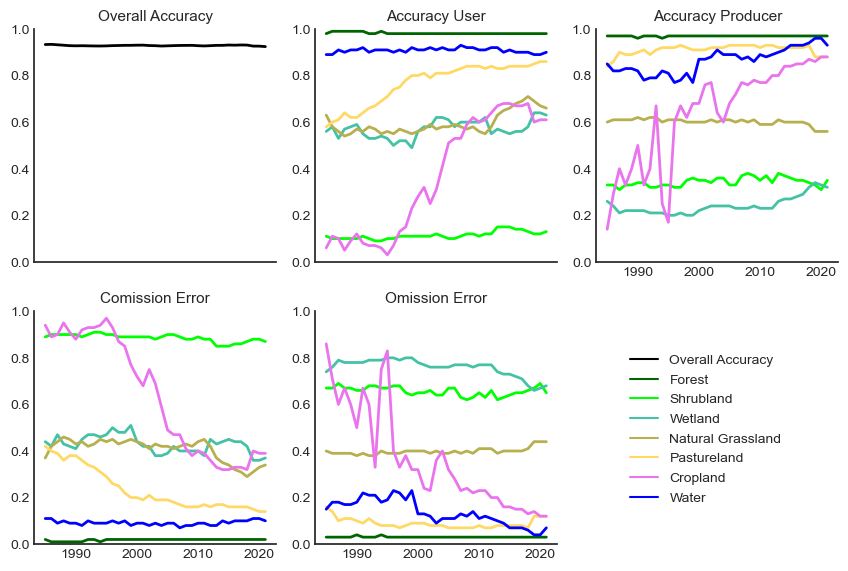

In [38]:
g = sns.relplot(
    data=df_all_metrics, kind='line', x='year', y='value', 
    col='metrics', facet_kws={'sharey':False}, height=3, hue='classe', palette = ['black'] + COLORS,
    legend="full",col_wrap=3, linewidth=2, aspect=1
)
#.query('classe != "All"')
for ax in g.axes:
    thres = 0.15
    y_lim = ax.get_ylim()
    ax.set_ylim(0, 1)
    # ax.xaxis.
    #ax.grid(color='black', linestyle='dotted', linewidth=1)

    ax.set_title(ax.get_title().replace('metrics = ', ''), fontsize=11)


g.set_axis_labels("", "")
g._legend.set_title("")
g._legend.texts[0].set_text("Overall Accuracy")
g._legend._legend_box.sep = -5  # move title down slightly

sns.move_legend(g, "upper left", bbox_to_anchor=(.63, .42))

plt.show()


## Total Samples Chart

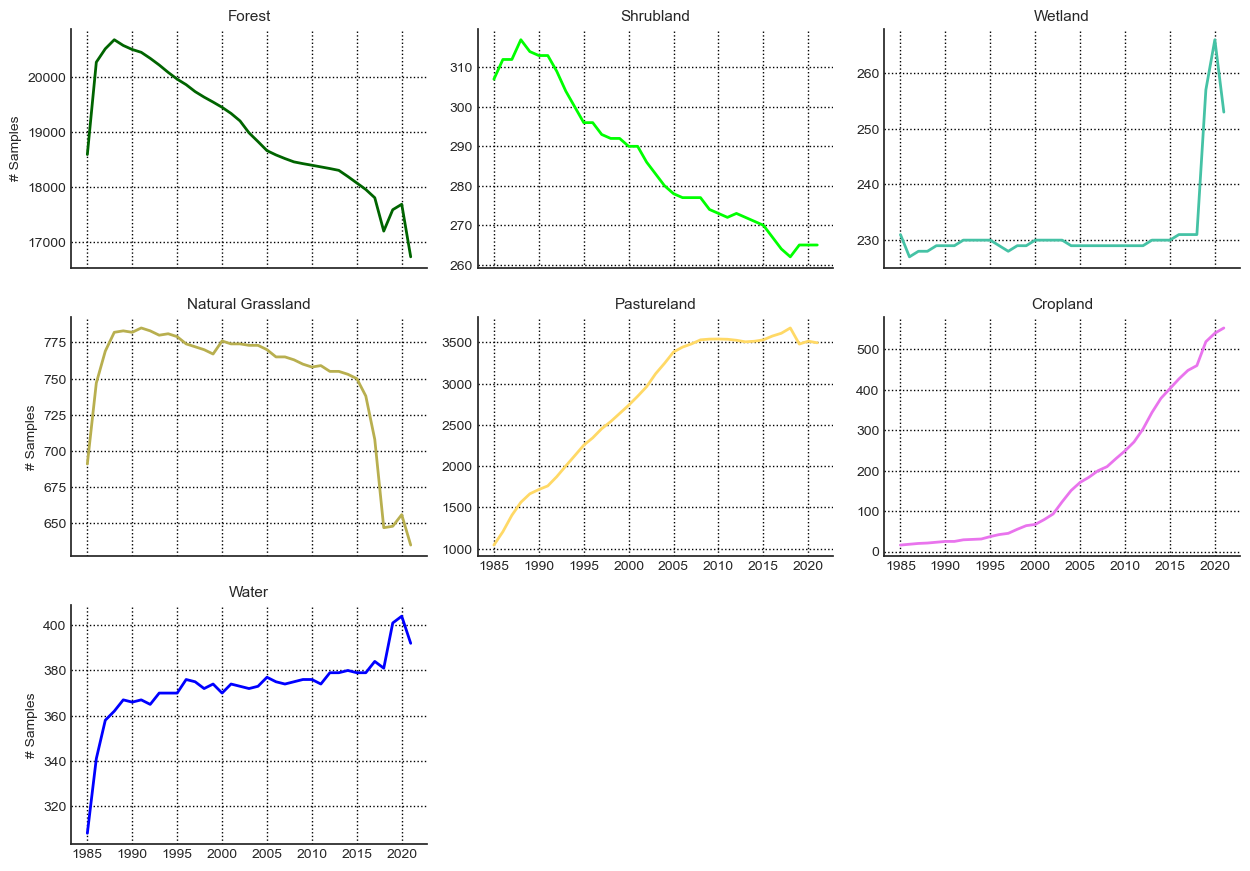

In [12]:
@ticker.FuncFormatter
def million_formatter(x, pos):
    return "%.2f" % (x/1E6)


g = sns.relplot(
    data=df_cm_years, kind='line', x='Year', y='Total', palette = COLORS,
    col='classes', facet_kws={'sharey':False}, height=3, hue = 'classes',
    legend=False,col_wrap=3, linewidth=2, aspect=1.4
)

for ax in g.axes:
    ax.grid(color='black', linestyle='dotted', linewidth=1)
    ax.set_title(ax.get_title().replace('classes = ', ''), fontsize=11)
    #ax.yaxis.set_major_formatter(million_formatter)



g.set_axis_labels("", "# Samples")
plt.show()